<h1> Student_strss_level</h1>
<h1>Introduction</h1>


Student life comes with excitement, growth, and opportunities, but also with challenges like heavy study loads, career concerns, lack of sleep, and peer pressure. All these can add up and affect a student’s stress levels in different ways.

This dataset records a variety of factors — psychological (like anxiety, self-esteem, depression), physical (headache, blood pressure, sleep quality), academic (study load, performance, teacher-student relationship), and social (peer pressure, bullying, social support). The target column stress_level tells us whether a student’s stress is low, medium, or high.

 The main goal of this analysis is to explore how these factors influence student stress levels. We want to identify the strongest contributors, find patterns and correlations, and generate insights that can guide ways to improve student well-being and academic success.

<h3> Import the necessary libraries</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Import Dataset</h3>

In [3]:
df = pd.read_csv("c:\\data_science\\project\StressLevelDataset .csv")

<h3> Display the first 5 rows of the dataset</h3>

In [4]:
print(df.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

<h3>Display the last 5 rows of the dataset</h3>

In [5]:
print(df.tail())

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep_quality  breathing_problem  noise_level  \
1095               1              3                  2            2   
1096               3              0                  0            0   
1097               2              5                  2            2   
1098               3              1                  4            3   
1099               3              0                  3            3   

      living_conditions  ...  basic_needs  academic_performance  study_load  \
1095   

<h3>Data cleaning</h3>

In [6]:
# Check whether there are any missing values
print(df.isna().sum())

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [7]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ','_')

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

<h3>Data Understanding</h3>

In [9]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [10]:
# Use summary statistics to understand distributions.
print(df.describe())

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

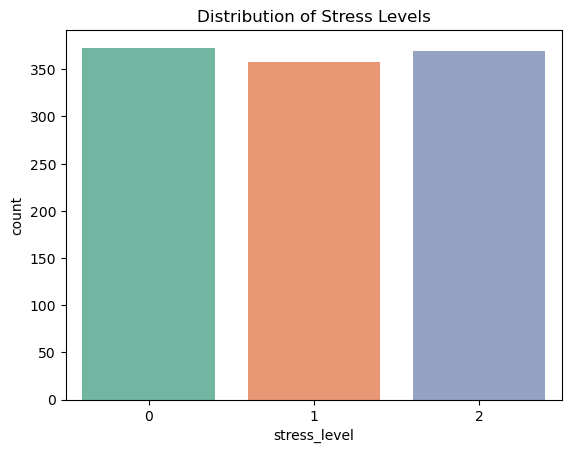

0    33.909091
2    33.545455
1    32.545455
Name: stress_level, dtype: float64


In [11]:
#How many students fall into each stress category?

sns.countplot(x='stress_level', data=df, palette="Set2")
plt.title("Distribution of Stress Levels")
plt.show()

print(df['stress_level'].value_counts(normalize=True) * 100)


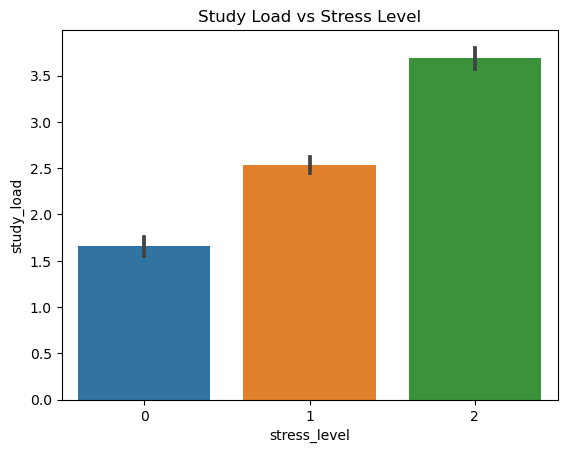

In [12]:
#How does study load vary across stress categories?

sns.barplot(x='stress_level', y='study_load', data=df)
plt.title("Study Load vs Stress Level")
plt.show()



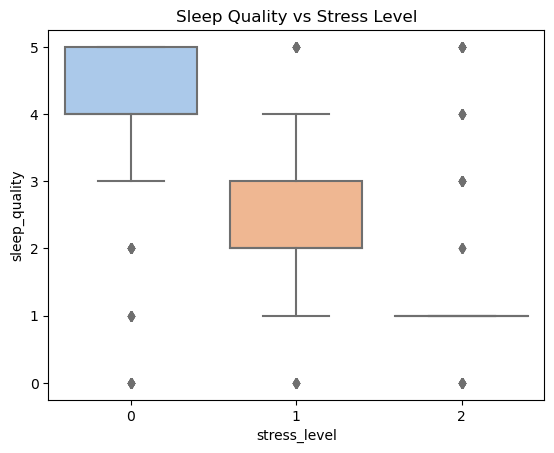

In [13]:
#How does sleep quality differ among students in low, medium, and high stress levels?

sns.boxplot(x='stress_level', y='sleep_quality', data=df, palette="pastel")
plt.title("Sleep Quality vs Stress Level")
plt.show()

In [14]:
#Between peer pressure and bullying, which factor appears to have a stronger impact on student stress?

df[['peer_pressure','bullying','stress_level']].corr()['stress_level']


peer_pressure    0.690684
bullying         0.751162
stress_level     1.000000
Name: stress_level, dtype: float64

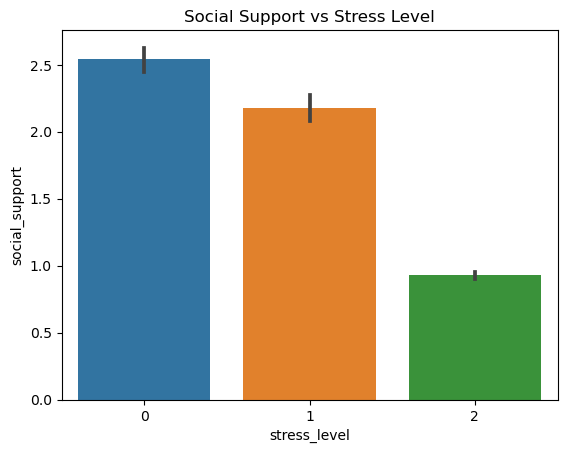

In [15]:
#How does social support affect stress levels?

sns.barplot(x='stress_level', y='social_support', data=df)
plt.title("Social Support vs Stress Level")
plt.show()


In [16]:
#Do health issues increase student stress?

health_cols = ['headache','blood_pressure','breathing_problem']
df[health_cols + ['stress_level']].corr()['stress_level']


headache             0.713484
blood_pressure       0.394200
breathing_problem    0.573984
stress_level         1.000000
Name: stress_level, dtype: float64

In [17]:
#Are students with a history of mental health problems more likely to report high stress compared to others

df.groupby('mental_health_history')['stress_level'].mean()


mental_health_history
0    0.471326
1    1.536900
Name: stress_level, dtype: float64

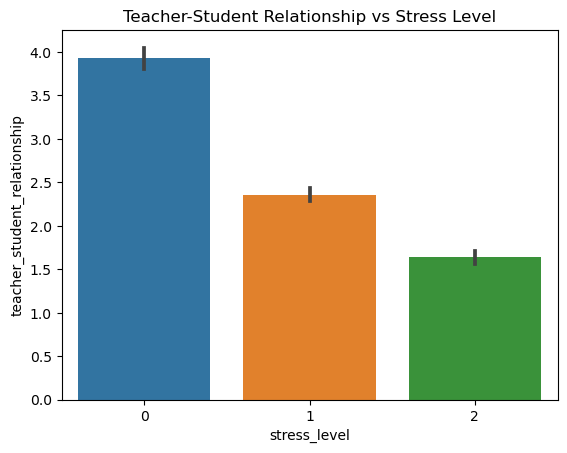

In [18]:
#Does the quality of the teacher–student relationship influence the stress levels of students?

sns.barplot(x='stress_level', y='teacher_student_relationship', data=df)
plt.title("Teacher-Student Relationship vs Stress Level")
plt.show()


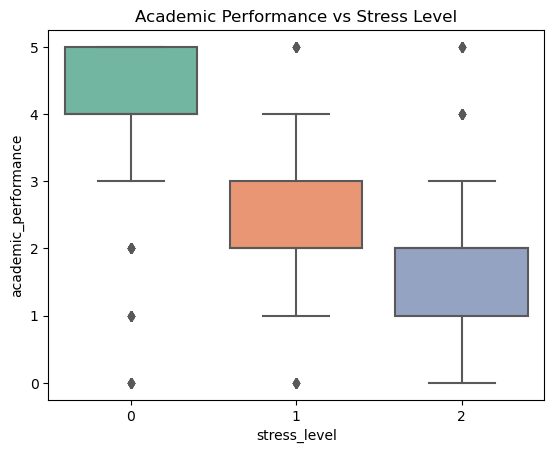

In [19]:
#How does academic performance vary among students with different stress levels?

sns.boxplot(x='stress_level', y='academic_performance', data=df, palette="Set2")
plt.title("Academic Performance vs Stress Level")
plt.show()


In [20]:
#Which psychological factor has the highest average value among students?

psych_cols = ['anxiety_level','self_esteem','depression']
df[psych_cols].mean()

anxiety_level    11.063636
self_esteem      17.777273
depression       12.555455
dtype: float64

In [21]:
#What are the average scores of anxiety, self-esteem, and depression among all students?

# Psychological factors
psych_cols = ['anxiety_level','self_esteem','depression']

# Calculate mean values
avg_psych = df[psych_cols].mean()
print("Average scores of psychological factors:\n", avg_psych)



Average scores of psychological factors:
 anxiety_level    11.063636
self_esteem      17.777273
depression       12.555455
dtype: float64


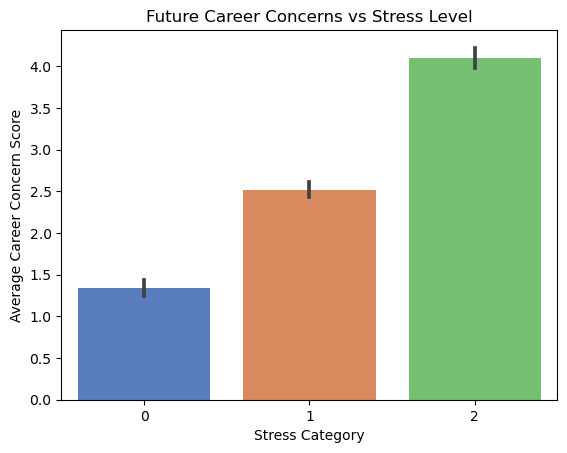

stress_level
0    1.335121
1    2.522346
2    4.100271
Name: future_career_concerns, dtype: float64

In [ ]:
#Do future career concerns significantly contribute to higher stress among students?

# Barplot to compare career concerns across stress levels
sns.barplot(x='stress_level', y='future_career_concerns', data=df, palette="muted")
plt.title("Future Career Concerns vs Stress Level")
plt.xlabel("Stress Category")
plt.ylabel("Average Career Concern Score")
plt.show()

# Numerical check
df.groupby['future_care('stress_level')er_concerns'].mean()


In [23]:
#What is the average academic performance in each stress category?

# Group by stress level and calculate mean academic performance
avg_perf = df.groupby('stress_level')['academic_performance'].mean()
print("Average academic performance by stress category:\n", avg_perf)


Average academic performance by stress category:
 stress_level
0    4.142091
1    2.491620
2    1.661247
Name: academic_performance, dtype: float64


<h3>Outlier Detection</h3>

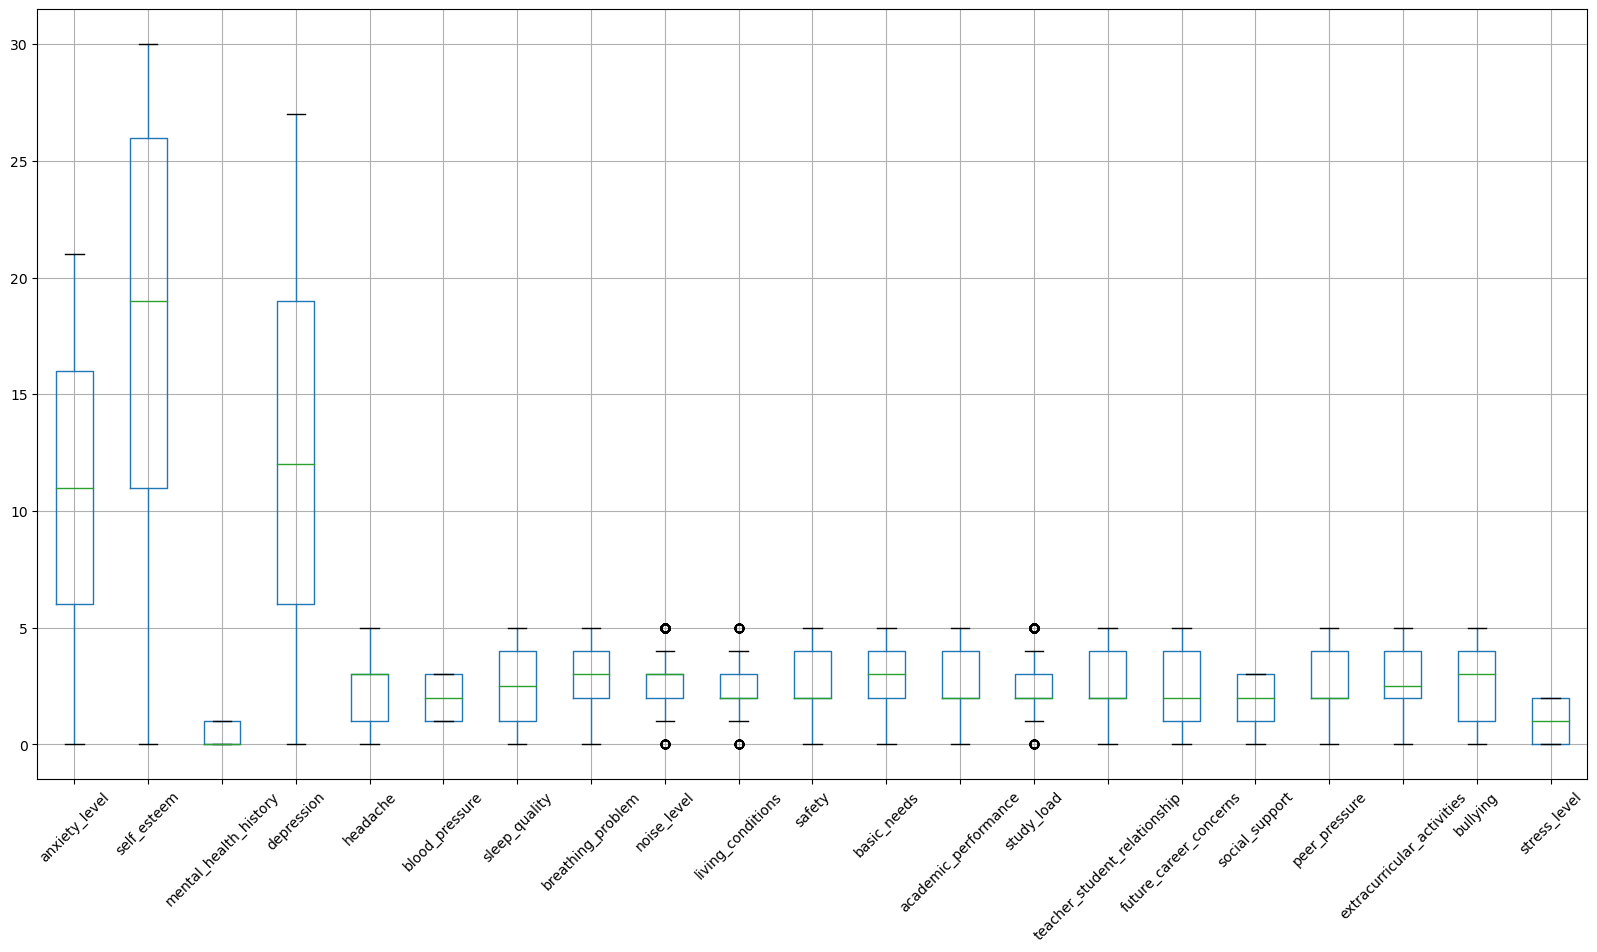

In [ ]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=45)
plt.show()

<h3>Suggestions and Recommendations</h3>



    1. Mental Health Support Programs

Since anxiety and depression are strongly linked with stress, colleges should provide regular counseling sessions, workshops, and peer support groups to help students manage psychological pressure.

    2. Balanced Study Load

The analysis showed that higher study load directly increases stress. Academic institutions should balance workloads, reduce unnecessary assignments, and encourage effective time management.

    3. Career Guidance

Future career concerns were found to be a major stress factor. Universities should offer career counseling, skill-development workshops, and internship opportunities to help students feel more secure about their future.

    4. Strengthening Teacher–Student Relationships

A positive teacher–student relationship lowers stress. Institutions should train teachers to be approachable and supportive, ensuring students feel comfortable seeking academic or personal guidance.

    5. Social Support Networks

Social support reduces high stress. Schools can promote student clubs, peer mentoring, and group activities to create a stronger community and reduce isolation.

    6. Anti-Bullying Measures

Bullying has a stronger effect on stress than peer pressure. Strict anti-bullying policies, anonymous reporting systems, and awareness campaigns must be enforced.

    7. Health & Lifestyle Improvements

Headaches, blood pressure, and poor sleep quality are higher in stressed students. Institutions should encourage healthy sleep routines, physical activities, and relaxation techniques (yoga, meditation, sports).

    8. Better Living & Environmental Conditions

Poor living conditions and noise contribute to stress. Hostels and student accommodations should be safe, hygienic, and supportive of student well-being.